# Régression Linéaire Multiple et Polynomiale Numpy

Guillaume Saint-Cirgue
https://machinelearnia.com/


In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Régression Polynomiale: 1 variable $x_1$

## 1.1 Dataset

Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice $X$ ainsi qu'un nombre égal de lignes dans le vecteur $\theta$.

Dans ce notebook, nous allons développer un ploynome de degré 2: $f(x) = ax^2 + bx + c$. Pour celà, il faut développer les matrices suivantes:

$X = \begin{bmatrix} x^{2 (1)} & x^{(1)} & 1 \\ ... & ... & ... \\ x^{2 (m)} & x^{(m)} & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *note : le vecteur $y$ reste le meme que pour la régression linéaire*

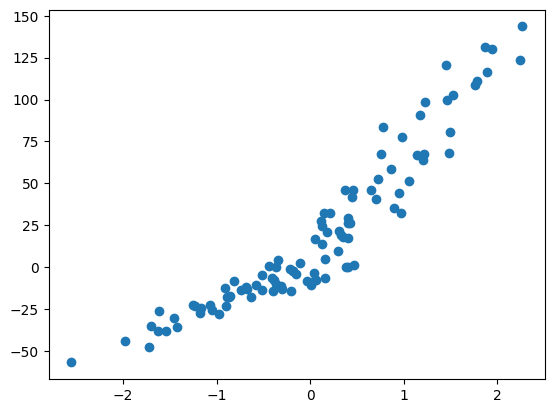

In [2]:
np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire

plt.scatter(x, y) # afficher les résultats. x en abscisse et y en ordonnée

In [3]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [4]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [5]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

## 1.2 Modèle Linéaire
On implémente un modèle $F = X.\theta$, puis on teste le modèle pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir à quoi ressemble le modèle initial, défini par la valeur de $\theta$

In [6]:
def model(X, theta):
    return X.dot(theta)

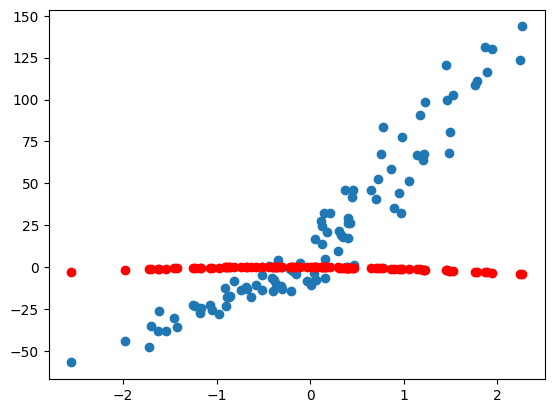

In [7]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

## 1.3 Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenter l'Erreur Quadratique Moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

np.float64(1328.6654828872622)

## 1.4 Gradients et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 1.5 Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modèle entrainé, on observe les resultats par rapport a notre Dataset

In [12]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [13]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 8.60077615],
       [42.23116732],
       [ 8.18143081]])

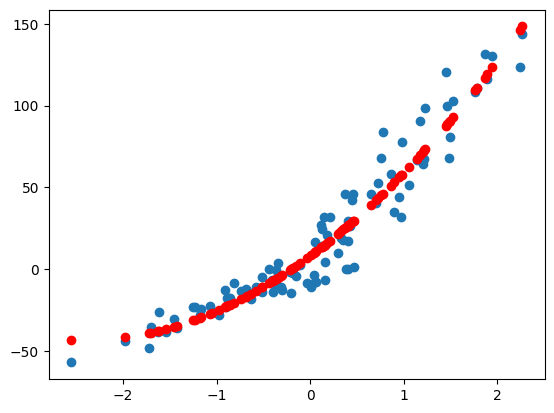

In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

## 1.6 Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout à travers les itérations. On est sensé obtenir une courbe qui diminue à chaque itération jusqu'à stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

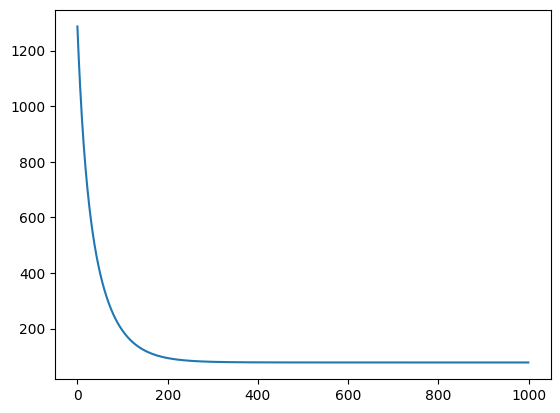

In [15]:
plt.plot(range(n_iterations), cost_history)

## 1.7 Evaluation finale
Pour évaluer la réelle performance de notre modèle avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modèle

In [16]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [17]:
coef_determination(y, predictions)

np.float64(0.9287186469389942)

# 2. Régression Multiples Variables
C'est lorsqu'on integre plusieures variables $x_1, x_2, x_3, etc.$ à notre modèle que les choses commencent à devenir vraiment intéressantes. C'est peut-être aussi à ce moment que les gens commencent parfois à parler *d'intelligence artificielle*, car il est difficile pour un être humain de se représenter dans sa tête un modèle à plusieurs dimensions (nous n'évoluons que dans un espace 3D). On se dit alors que la machine, quant à elle, arrive à se réprésenter ces espaces, car elle y trouve le meilleur modèle (avec la descente de gradient) et les gens disent donc qu'elle est intelligente, alors que ce ne sont que des mathématiques.

## 2.1 Dataset


Dans ce notbook, nous allons créer un modèle à 2 variables $x_1, x_2$. Pour cela, il suffit d'injecter les différentes variables $x_1, x_2$ (les **features** en anglais) dans la matrice $X$, et de créer le vecteur $\theta$ qui s'accorde avec:



$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & 1 \\ ... & ... & ... \\ x^{(m)}_1 & x^{(m)}_2 & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *note : le vecteur $y$ reste le meme que pour la régression linéaire*


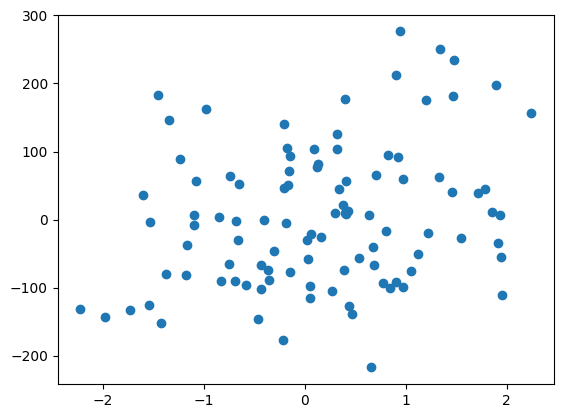

In [18]:
np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=2, noise = 10) # creation d'un dataset (x, y) linéaire

plt.scatter(x[:,0], y) # afficher les résultats. x_1 en abscisse et y en ordonnée

Ce Dataset ne contenant que 2 variables $x_1 et x_2$ il est possible de le visualiser dans un espace 3D. Comme vous pouvez le voir, ce modèle peut être représenté par une surface. Au passage, cette surface est plane car make_regression nous retourne des données linéaire. Si on veut créer une surface non plane, il suffit de modifier la valeur de y comme nous l'avons fait au début de ce notebook. (Nous ne le ferons pas ici)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook #activez cette ligne pour manipuler le graph 3D

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

UsageError: unrecognized arguments: #activez cette ligne pour manipuler le graph 3D


In [20]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [21]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [22]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

## 2.2 Modèle Linéaire
## 2.3 Fonction Cout
## 2.4 Gradient Descent

Nos fonctions étant déjà implémentées, inutile de les réécrire. Passons imédiatement à la phase d'entrainement !

## 2.5 Phase d'entrainement

In [23]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [24]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[28.67154616],
       [97.29524926],
       [-0.511481  ]])

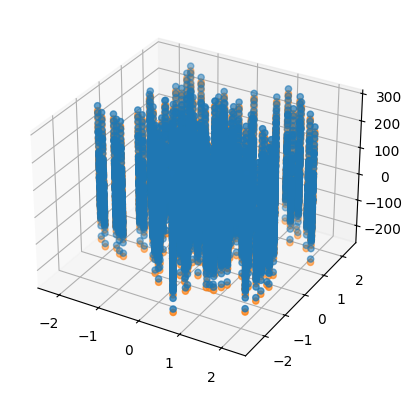

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

## 2.6 Courbe d'apprentissage

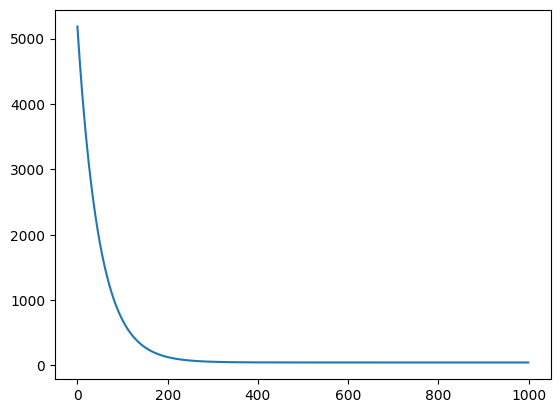

In [26]:
plt.plot(range(n_iterations), cost_history)

## 1.7 Evaluation finale

In [27]:
coef_determination(y, predictions)

np.float64(0.9916687122277607)

Merci d'avoir suivi ce tutoriel. Abonnez-vous a ma chaine youtube pour ne pas louper d'autres tutos (chaque semaine de nouvelles vidéos!) https://www.youtube.com/channel/UCmpptkXu8iIFe6kfDK5o7VQ